Do some examples for extracting the FOV from the complete simulation.

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

First, let's take a look at the total simulation (just pick larger distance/resolution so smaller file and quicker loading):

In [8]:
distance = '100Mpc'; resolution = 100.; slicewidth = 5; machine='coho'
data_tuple = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)
data_tuple[0].shape

data_100Mpc_100arcsec.npz does not exist, making it now...
Loading a 5Mpc slice of data...
Data exists, loading emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 16.0.
Saving the data to data_100Mpc_100arcsec.npz...


(2000, 2000)

The type of size is <type 'int'>


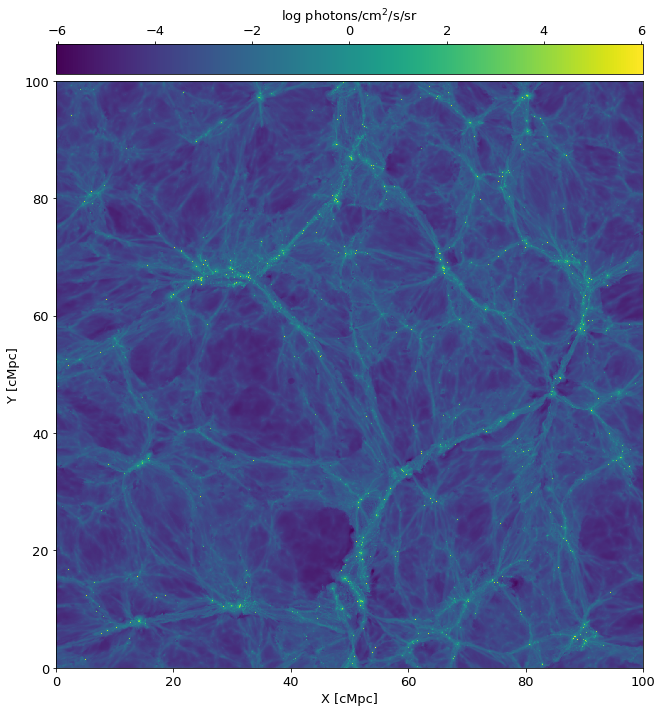

In [9]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(data_tuple[0],100,ax1,xystarts = [0,0])
plt.tight_layout()